# 🧠Brain Tumor 3D EDA

* **The goal:**In this competition you will predict the genetic subtype of glioblastoma using MRI (magnetic resonance imaging) scans to train and test your model to detect for the presence of MGMT promoter methylation.

# Data Description
* The competition data is defined by three cohorts: **Training**, **Validation** (Public), and **Testing** (Private). The “Training” and the “Validation” cohorts are provided to the participants, whereas the “Testing” cohort is kept hidden at all times, during and after the competition.

* These 3 cohorts are structured as follows: Each independent case has a dedicated folder identified by a five-digit number. Within each of these “case” folders, there are four sub-folders, each of them corresponding to each of the structural multi-parametric MRI (mpMRI) scans, in DICOM format.

## .dcm
The .dcm file is DICOM (Digital Imaging and Communications in Medicine), which is a file for recording medical images and related information in medical digital imaging and communication. When used for medical image processing, we need to read the image information in the .dcm file into the python program.

## The exact mpMRI scans included are:
1.  Fluid Attenuated Inversion Recovery (FLAIR)
1. T1-weighted pre-contrast (T1w)
1. T1-weighted post-contrast (T1Gd)
1. T2-weighted (T2)

**Exact folder structure:**

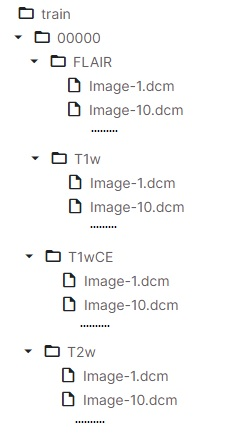

## Files
* **train** folder containing the training files, with each top-level folder representing a subject
* **train_labels.csv** file containing the target MGMT_value for each subject in the training data (e.g. the presence of MGMT promoter methylation)
* **test** the test files, which use the same structure as train/; your task is to predict the MGMT_value for each subject in the test data. NOTE: the total size of the rerun test set (Public and Private) is ~5x the size of the Public test set
* **sample_submission.csv**  a sample submission file in the correct format

# importing libraries

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import os
import json
import glob
import random
import collections
import cv2

import pydicom
from pydicom.pixel_data_handlers.util import apply_voi_lut

from matplotlib import animation, rc
rc('animation', html='jshtml')


# loading data

In [ ]:
train_df = pd.read_csv("../input/rsna-miccai-brain-tumor-radiogenomic-classification/train_labels.csv")
train_df.head(5)

In [ ]:
plt.figure(figsize=(5, 5))
sns.countplot(data=train_df, x="MGMT_value");

# Data Visualization

In [ ]:
def load_dicom(path):
    dicom = pydicom.read_file(path)
    data = dicom.pixel_array
    data = data - np.min(data)
    if np.max(data) != 0:
        data = data / np.max(data)
    data = (data * 255).astype(np.uint8)
    return data



def visualize_sample(
    brats21id, 
    slice_i,
    mgmt_value,
    types=("FLAIR", "T1w", "T1wCE", "T2w")
):
    plt.figure(figsize=(10, 3))
    patient_path = os.path.join(
        "../input/rsna-miccai-brain-tumor-radiogenomic-classification/train/", 
        str(brats21id).zfill(5),
    )
    for i, t in enumerate(types, 1):
        t_paths = sorted(
            glob.glob(os.path.join(patient_path, t, "*")), 
            key=lambda x: int(x[:-4].split("-")[-1]),
        )
        data = load_dicom(t_paths[int(len(t_paths) * slice_i)])
        plt.subplot(1, 4, i)
        plt.imshow(data, cmap="gray")
        plt.title(f"{t}", fontsize=10)
        plt.axis("off")
    plt.show()
    


# MGMT=0

In [ ]:
list0=[315,176,153,164]
for i in list0:
    _brats21id = train_df.iloc[i]["BraTS21ID"]
    _mgmt_value = train_df.iloc[i]["MGMT_value"]
    visualize_sample(brats21id=_brats21id, mgmt_value=_mgmt_value, slice_i=0.55)

# MGMT=1

In [ ]:
list1=[184,315,155,228]
for i in list1:
    _brats21id = train_df.iloc[i]["BraTS21ID"]
    _mgmt_value = train_df.iloc[i]["MGMT_value"]
    visualize_sample(brats21id=_brats21id, mgmt_value=_mgmt_value, slice_i=0.55)

# Animation

In [ ]:
def create_animation(ims):
    fig = plt.figure(figsize=(5, 5))
    plt.axis('off')
    im = plt.imshow(ims[0], cmap="gray")

    def animate_func(i):
        im.set_array(ims[i])
        #return [im]
    return animation.FuncAnimation(fig, animate_func, frames = len(ims), interval = 1000//4)

def load_dicom_line(path):
    t_paths = sorted(
        glob.glob(os.path.join(path, "*")), 
        key=lambda x: int(x[:-4].split("-")[-1]),
    )
    images = []
    for filename in t_paths:
        data = load_dicom(filename)
        if data.max() == 0:
            continue
        images.append(data)
        
    return images

In [ ]:
images = load_dicom_line("../input/rsna-miccai-brain-tumor-radiogenomic-classification/train/00176/FLAIR")
anm_FLAIR0=create_animation(images)
images = load_dicom_line("../input/rsna-miccai-brain-tumor-radiogenomic-classification/train/00176/T1w")
anm_T1W0=create_animation(images)
images = load_dicom_line("../input/rsna-miccai-brain-tumor-radiogenomic-classification/train/00176/T1wCE")
anm_T1wCE0=create_animation(images)
images = load_dicom_line("../input/rsna-miccai-brain-tumor-radiogenomic-classification/train/00176/T2w")
anm_T2w0=create_animation(images)


images = load_dicom_line("../input/rsna-miccai-brain-tumor-radiogenomic-classification/train/00184/FLAIR")
anm_FLAIR1=create_animation(images)
images = load_dicom_line("../input/rsna-miccai-brain-tumor-radiogenomic-classification/train/00184/T1w")
anm_T1W1=create_animation(images)
images = load_dicom_line("../input/rsna-miccai-brain-tumor-radiogenomic-classification/train/00184/T1wCE")
anm_T1wCE1=create_animation(images)
images = load_dicom_line("../input/rsna-miccai-brain-tumor-radiogenomic-classification/train/00184/T2w")
anm_T2w1=create_animation(images)

# MGMT=0

### FLAIR

In [ ]:
anm_FLAIR0

# T1w

In [ ]:
anm_T1W0

# T1wCE

In [ ]:
anm_T1wCE0

### T2W

In [ ]:
anm_T2w0

# MGMT=1

### FLAIR

In [ ]:
anm_FLAIR1

# T1w

In [ ]:
anm_T1W1

# T1wCE

In [ ]:
anm_T1wCE1

### T2W

In [ ]:
anm_T2w1

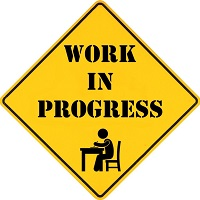

# References

1. https://www.kaggle.com/avloss/eda-with-animation
1. https://www.kaggle.com/polomarco/visualizatio-3d-nifti-dicom-matlab-nrrd-files
1. https://www.kaggle.com/ihelon/brain-tumor-eda-with-animations-and-modeling
1. https://www.kaggle.com/ihelon/brain-tumor-eda-with-animations-and-modeling

## WORK IN PROGRESS...